In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model
from warnings import filterwarnings
filterwarnings('ignore')
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import os

In [2]:
# !pip install nltk
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\hkmeh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloadin

True

In [3]:
file="Reviews.csv"
import pandas as pd
df= pd.read_csv(file)
print(df.shape)

(334119, 31)


In [4]:
df.head()

,Unnamed: 0,ï»¿,uuid,createdAt,updatedAt,text,isAnonymous,reviewerName,reviewerId,ratings_overall,...,longitude,primary_cuisine,primary_cuisine_id,cuisines,review_number,restaurant_overall_rating,hero_image,hero_listing_image,vertical_type_ids,web_path
0,0,0,68e8f769-a0f0-460c-bfb9-16662fcc1e17,2023-11-02T06:48:08Z,2023-11-02T06:48:08Z,too much small amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
1,1,1,706a1e43-7475-4d7f-8488-cb8ed2ea8991,2023-10-27T07:35:53Z,2023-10-27T07:35:53Z,very small in amount,False,MOON,bdaclwhn,2,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
2,2,2,16cd99a3-7295-432e-b193-1551df62d255,2023-10-25T18:09:17Z,2023-10-25T18:09:17Z,food average but their desert booter halwa and...,False,SALMAN,bdjrt0zq,3,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
3,3,3,61a9fdf3-ad6b-4d23-9436-1f2f596bbcff,2023-10-25T07:48:39Z,2023-10-25T07:48:39Z,fresh and tasty,False,GOLAM,b6hrp8of,5,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...
4,4,4,a7835cdf-2c1f-4cf0-b9d5-2777d904d746,2023-10-15T13:37:20Z,2023-10-15T13:37:20Z,everything i ordered was good,False,FERZANA,bddrkjrd,4,...,90.39168,Curry,195,"['Curry', 'Rice Dishes', 'Bangladeshi', 'Asian']",146,3.7,https://images.deliveryhero.io/image/fd-bd/LH/...,https://images.deliveryhero.io/image/fd-bd/LH/...,"['restaurants', 'home_based_kitchen']",https://foodpanda.com.bd/restaurant/a02g/mahis...


In [5]:
df.loc[1:10, ['text','reviewerName', 'ratings_overall','labels']]

,text,reviewerName,ratings_overall,labels
1,very small in amount,MOON,2,1
2,food average but their desert booter halwa and...,SALMAN,3,2
3,fresh and tasty,GOLAM,5,3
4,everything i ordered was good,FERZANA,4,3
5,kalo jira vhorta balu vhorta not recommended b...,FERZANA,1,1
6,quantity of dal should be little more otherwis...,FERZANA,4,3
7,beef was too poor in size quantity aganist pri...,DEDAR,3,2
8,chicken was not up to the mark and lotpoti was...,IFTEKHER,5,3
9,lot of sand in kali jeers bortha,MOHAMMAD,4,3
10,bad,MOHAMMAD,1,1


In [6]:
df['labels'].value_counts()

labels
1    161275
3    133529
2     39315
Name: count, dtype: int64

In [7]:
rating = df[(df['labels'] == 1) | (df['labels'] == 3)]
rating.shape

(294804, 31)

In [8]:
y = rating['labels']
x = rating['text'].reset_index()

In [9]:
y.unique()

array([1, 3], dtype=int64)

In [10]:
y

0         1
1         1
3         3
4         3
5         1
         ..
334113    1
334115    1
334116    3
334117    3
334118    1
Name: labels, Length: 294804, dtype: int64

In [11]:
x.iloc[0]['text']

'too much small amount'

# Text preprocessing

In [12]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don t", "do not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"didn t", "did not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"won t", "will not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"isn t", "is not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"aren t", "are not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"wasn t", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"weren t", "were not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"haven t", "have not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hadn t", "had not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"couldn t", "could not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"shouldn t", "should not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"can t", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"it s", "it is", text)
    text = re.sub(r"kebab", "kabab", text)
    text = re.sub(r"nun", "naan", text)
    text = re.sub(r"nan", "naan", text)
    text = re.sub('[^a-zA-Z]'," ",text)
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text= re.sub('\s{2,}', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
#     print(text)
    text = "".join(text)
    return text

In [13]:
x['text']=x['text'].apply(clean_text)

In [14]:
x.iloc[0:20]['text']

0                                 too much small amount
1                                  very small in amount
2                                       fresh and tasty
3                         everything i ordered was good
4     kalo jira vhorta balu vhorta not recommended b...
5     quantity of dal should be little more otherwis...
6     chicken was not up to the mark and lotpoti was...
7                      lot of sand in kali jeers bortha
8                                                   bad
9     very good food i chose this home kitchen rando...
10    honestly eating today s beef ribs and dal felt...
11    i ate good food after a long time the food was...
12           really good clean tasting will order again
13                           too spicy with dry chilli 
14                                         good quality
15    very good packaging now food was absolutely de...
16    fish was i fourth of its displayed at photo fo...
17                             very bad delivery

In [15]:
x.iloc[111]['text']

'the portion was too small its a frog leg probably '

In [16]:
x.iloc[0]

index                        0
text     too much small amount
Name: 0, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(x['text'])

In [18]:
bag=vect.fit_transform(doc)

In [19]:
print(vect.vocabulary_)

{'too': 41227, 'much': 27320, 'small': 37520, 'amount': 1495, 'very': 42888, 'in': 18701, 'fresh': 15257, 'and': 1562, 'tasty': 39766, 'everything': 13619, 'ordered': 29670, 'was': 43490, 'good': 16373, 'kalo': 20978, 'jira': 20234, 'vhorta': 42997, 'balu': 3125, 'not': 28622, 'recommended': 34033, 'baki': 3042, 'shob': 36686, 'valo': 42585, 'chilo': 7606, 'quantity': 33383, 'of': 29022, 'dal': 9760, 'should': 36922, 'be': 3704, 'little': 24545, 'more': 27025, 'otherwise': 29921, 'specially': 38178, 'beef': 3817, 'chicken': 7431, 'up': 42230, 'to': 41033, 'the': 40360, 'mark': 25572, 'lotpoti': 24782, 'full': 15502, 'potato': 32459, 'alu': 1253, 'bhorta': 4455, 'did': 11219, 'seem': 35953, 'lot': 24769, 'sand': 35459, 'kali': 20954, 'jeers': 19947, 'bortha': 5474, 'bad': 2837, 'food': 14924, 'chose': 8003, 'this': 40585, 'home': 17967, 'kitchen': 22544, 'randomly': 33739, 'but': 6173, 'really': 33933, 'got': 16549, 'packaging': 30244, 'please': 31882, 'always': 1294, 'maintain': 25144,

In [20]:
print(len(vect.vocabulary_))

44721


In [21]:
# print(bag.toarray())

In [22]:
r=np.array(x['text'].values).reshape(-1,1)

In [23]:
r.shape

(294804, 1)

# Bag of words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=40000, stop_words='english')
bow = bow_vectorizer.fit_transform(x['text'])
bow.shape

# TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(x['text'])
tfidf.shape

(294804, 44721)

In [25]:
tfidf

<294804x44721 sparse matrix of type '<class 'numpy.float64'>'
	with 2816353 stored elements in Compressed Sparse Row format>

# Train_test_split

In [26]:
y=y.values
X_train, X_test, Y_train, Y_test = train_test_split(tfidf, y, test_size=0.25, random_state=42)
print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (221103, 44721)
Size of Y_train (221103,)
Size of X_test (73701, 44721)
Size of Y_test (73701,)


# Decision Tree

In [27]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)
score = dt.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.8734616898006812


In [28]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = dt.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.8734616898006812

 Clasification report:
               precision    recall  f1-score   support

           1     0.8822    0.8879    0.8850     40426
           3     0.8627    0.8559    0.8593     33275

    accuracy                         0.8735     73701
   macro avg     0.8725    0.8719    0.8722     73701
weighted avg     0.8734    0.8735    0.8734     73701



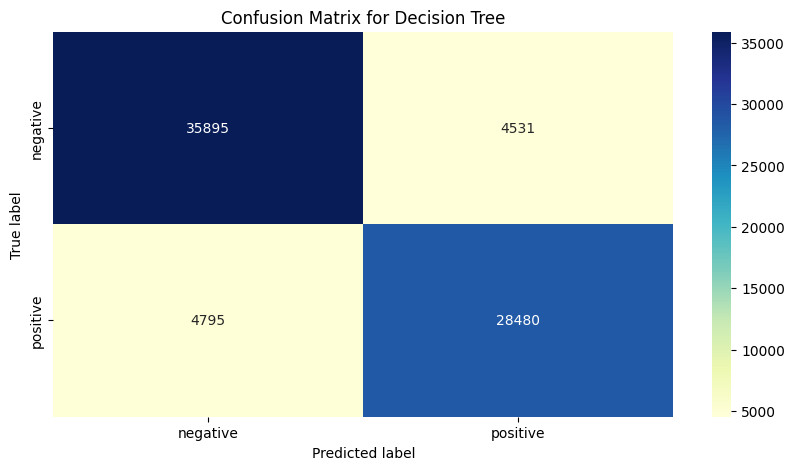

In [29]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Decision Tree')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear' )
lr=lr.fit(X_train, Y_train)
score = lr.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.9124435217975333


In [31]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = lr.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.9124435217975333

 Clasification report:
               precision    recall  f1-score   support

           1     0.9035    0.9408    0.9218     40426
           3     0.9243    0.8780    0.9005     33275

    accuracy                         0.9124     73701
   macro avg     0.9139    0.9094    0.9112     73701
weighted avg     0.9129    0.9124    0.9122     73701



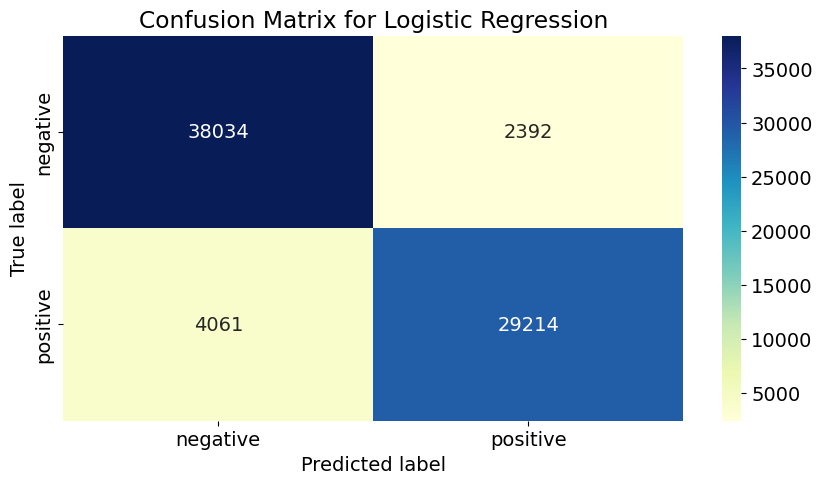

In [32]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Logistic Regression')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
 
rf= RandomForestClassifier( max_depth=20, random_state=42)
rf = rf.fit(X_train, Y_train)
score = rf.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.8059592135791916


In [34]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = rf.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.8059592135791916

 Clasification report:
               precision    recall  f1-score   support

           1     0.7535    0.9605    0.8445     40426
           3     0.9280    0.6182    0.7421     33275

    accuracy                         0.8060     73701
   macro avg     0.8407    0.7894    0.7933     73701
weighted avg     0.8323    0.8060    0.7982     73701



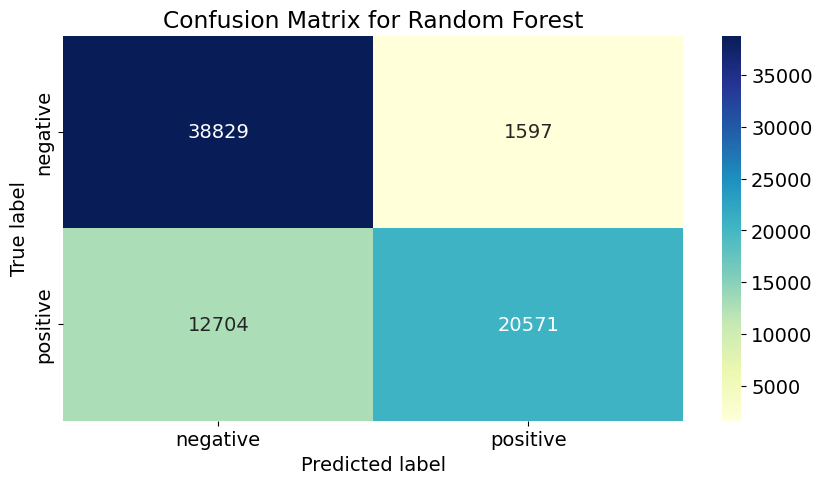

In [35]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Random Forest')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# SVM

In [36]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm = LinearSVC()
sv= CalibratedClassifierCV(svm) 
sv = sv.fit(X_train, Y_train)  
score =sv.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.9074910788184692


In [37]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = sv.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.9074910788184692

 Clasification report:
               precision    recall  f1-score   support

           1     0.9027    0.9318    0.9170     40426
           3     0.9137    0.8780    0.8955     33275

    accuracy                         0.9075     73701
   macro avg     0.9082    0.9049    0.9063     73701
weighted avg     0.9077    0.9075    0.9073     73701



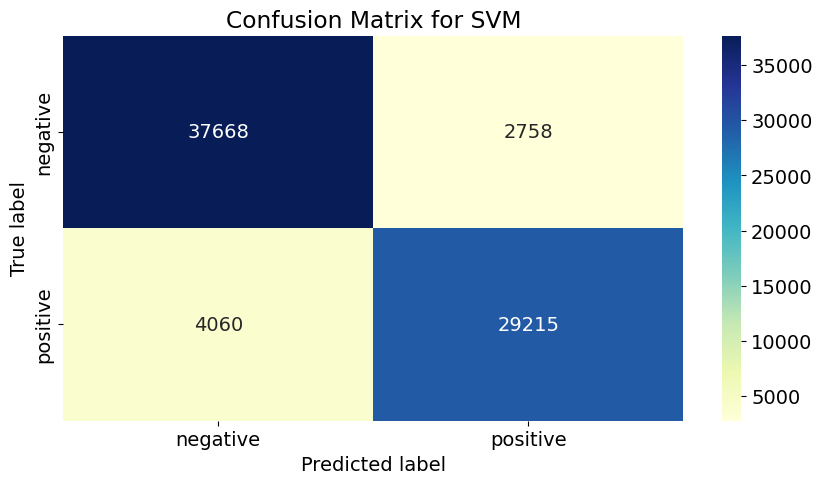

In [38]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for SVM')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# Naive Bayes

In [39]:
from sklearn import model_selection, naive_bayes, svm
nb = naive_bayes.MultinomialNB(alpha=0.1)
nb = nb.fit(X_train, Y_train) 
score = nb.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.8743300633641334


In [40]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = nb.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.8743300633641334

 Clasification report:
               precision    recall  f1-score   support

           1     0.8660    0.9120    0.8884     40426
           3     0.8858    0.8285    0.8562     33275

    accuracy                         0.8743     73701
   macro avg     0.8759    0.8703    0.8723     73701
weighted avg     0.8749    0.8743    0.8739     73701



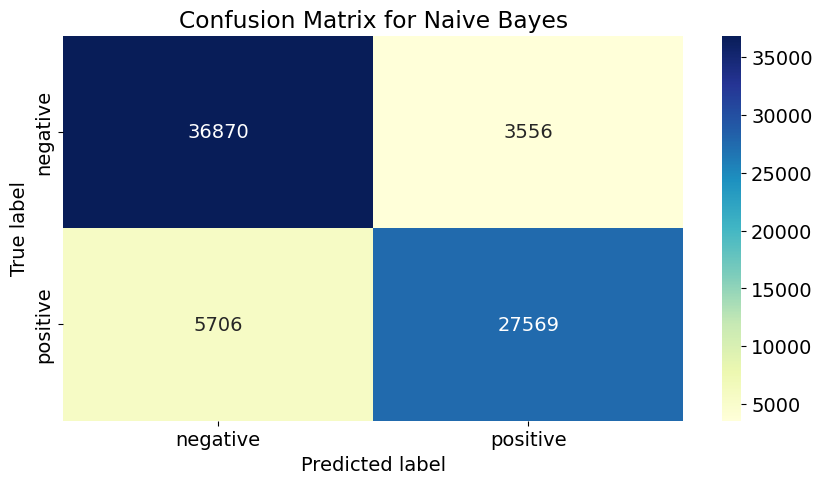

In [41]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for Naive Bayes')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# XGB Classifier 

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [43]:
import xgboost as xgb
model = xgb.XGBClassifier()

#Training the model on the training data
xg=model.fit(X_train, Y_train) 
score = xg.score(X_test, Y_test)
print("Accuracy:", score)

Accuracy: 0.8972469844371176


In [44]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = xg.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.8972469844371176

 Clasification report:
               precision    recall  f1-score   support

           0     0.8730    0.9510    0.9103     40426
           1     0.9332    0.8319    0.8797     33275

    accuracy                         0.8972     73701
   macro avg     0.9031    0.8915    0.8950     73701
weighted avg     0.9002    0.8972    0.8965     73701



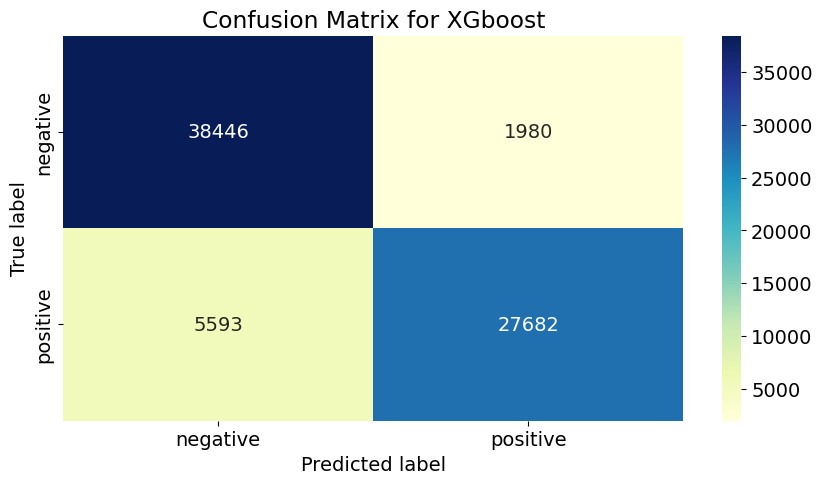

In [45]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for XGboost')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()

# KNN classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=10)
knn=model.fit(X_train, Y_train) 
score = knn.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6700723192358312


In [47]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = knn.predict(X_test)
pred_y = list(pred_y.flatten())
pred_y = np.round(pred_y)

print('Accuracy:', accuracy_score(Y_test, pred_y))
# print('F1 score:', f1_score(Y_test, pred_y))
# print('Recall:', recall_score(Y_test, pred_y))
# print('Precision:', precision_score(Y_test, pred_y))
print('\n Clasification report:\n', classification_report(Y_test,pred_y, digits=4))

Accuracy: 0.6700723192358312

 Clasification report:
               precision    recall  f1-score   support

           0     0.8755    0.4646    0.6070     40426
           1     0.5857    0.9198    0.7157     33275

    accuracy                         0.6701     73701
   macro avg     0.7306    0.6922    0.6614     73701
weighted avg     0.7447    0.6701    0.6561     73701



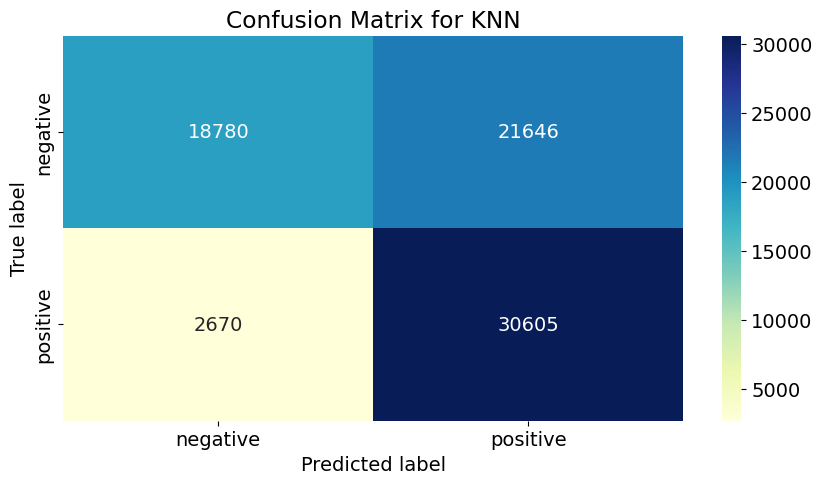

In [48]:
cm = confusion_matrix(Y_test, pred_y) 
classes = ['negative','positive']


cm_df = pd.DataFrame(cm,index = classes,columns = classes)

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt='g')
plt.title(f'Confusion Matrix for KNN')
# plt.title(f'Shallow Neural Network\nAccuracy: {acc}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.savefig(f'ann.png',dpi = 600,bbox_inches = 'tight')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.size': 14})
plt.show()